In [11]:
# Single-linear regression
# imports
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [12]:
# open and read dataset
Data = pd.read_csv('CO2.csv')
Data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [13]:
# Data desciption
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [14]:
# See the correlation in Dataset
Data.corr(numeric_only=True)

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


[]

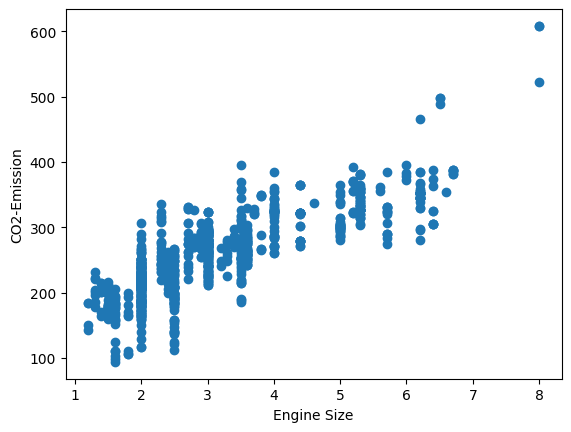

In [15]:
# visualise the correlations between Engine Size and CO2 Emission...

plt.scatter(Data['Engine Size(L)'], Data['CO2 Emissions(g/km)'])
plt.xlabel('Engine Size')
plt.ylabel('CO2-Emission')

plt.plot()

In [16]:
# Features will need for Model training....
Data_y = Data['CO2 Emissions(g/km)']
Data_x = Data['Engine Size(L)']

In [17]:
# split test and training dataset

x_train, x_test, y_train, y_test = train_test_split(Data_x, Data_y, test_size=0.2, shuffle=True)

# reshape dataset meant for training
x_train = np.asanyarray(x_train)
x_test = np.asanyarray(x_test)
y_train = np.asanyarray(y_train)
y_test = np.asanyarray(y_test)

x_train = np.reshape(x_train, (-1,1))
y_train = np.reshape(y_train, (-1,1))

In [18]:
# Train single linear model
single = linear_model.LinearRegression()

single.fit(x_train, y_train)

LinearRegression()

In [19]:
# get the coefficients and interept used for optimizing the hypothesis line
coef = single.coef_
intcept = single.intercept_

In [20]:
# evaluating to see how well it did

# reshape test dataset
x_test = np.reshape(x_test, (-1,1))
y_test = np.reshape(y_test, (-1,1))

predictions = single.predict(x_test)

In [21]:
# determine the loss function i.e. MSE

MSE = np.mean(np.absolute(y_test - predictions))
print(MSE)

28.287392143192637


[]

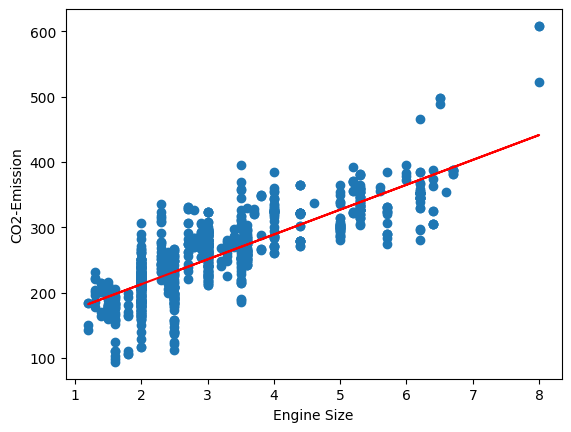

In [22]:
# Plot hypothesis line

plt.scatter(Data['Engine Size(L)'], Data['CO2 Emissions(g/km)'])
plt.plot(x_train, coef[0][0]*x_train + intcept[0], 'r')
plt.xlabel('Engine Size')
plt.ylabel('CO2-Emission')

plt.plot()

In [23]:
# Multi-linear regression
Data_mx = Data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption(Comb (L/100 km))']]
Data_my = Data['CO2 Emissions(g/km)']

In [24]:
# split test and training dataset
trainx, testx, trainy ,testy = train_test_split(Data_mx, Data_my, test_size=0.2, shuffle=True)

# reshape dataset
trainx = np.asanyarray(trainx)
testx = np.asanyarray(testx)
trainy = np.asanyarray(trainy)
testy = np.asanyarray(testy)

In [25]:
# train multi regression model
multi = linear_model.LinearRegression()
multi.fit(trainx, trainy)

LinearRegression()

In [26]:
prediction = multi.predict(testx)

In [27]:
# determine the loss function i.e. MSE
MSE = np.mean(np.absolute(y_test - prediction))
print(MSE)

73.50233423491872
